# Project: No Show Appointment Dataset Investigation

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

The No-show appointments dataset contains information of over a 100 thousand medical appointments. This dataset is centered around the rate of no show and show of patients for appointments. It contains a number of features that might influence the rate of no-show such as age, and sms-received. 

**Questions**: The following questions are to be answered during the course of this investigation: Do the age of patients affect the chance of a no show at an appointment?, Which gender shows the most rate of no shows of appointments?, Does the neigbourhood of the patient affect the rate of no show?, and How does the sholarship affect the rate of no show?

In [2]:
#packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.dates as mdates
%matplotlib inline
import seaborn as sns

<a id='wrangling'></a>
## Data Wrangling


### General Properties

loading of data from the dataset

In [3]:
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

Viewing the dataset to get a brief description of the number of rows, columns and some statistics on the features

In [4]:
#viewing the first few rows of the dataset to have a look
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


Checking the number of rows and columns of the dataset

In [5]:
df.shape

(110527, 14)

Viewing the counts of missing vlaues, and data types of the columns

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


Checking for any missing values

In [7]:
df.isnull().any()

PatientId         False
AppointmentID     False
Gender            False
ScheduledDay      False
AppointmentDay    False
Age               False
Neighbourhood     False
Scholarship       False
Hipertension      False
Diabetes          False
Alcoholism        False
Handcap           False
SMS_received      False
No-show           False
dtype: bool

Viewing the rows of duplicated data

In [8]:
df.duplicated().sum()

0

Statisics of the columns that can be used in invesitgation

In [9]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


### Data Cleaning 
> This section of the reports showcases the cleaning process of of hte dataset. It includes dropping of certain columns not required in this invesigation, chaning of datatypes, and replace of values

Changing the column headings to lowercase to help improve consistensy of naming convention

In [10]:
df.columns = df.columns.str.lower()

In [11]:
#confirming chnages in the dataset
df.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


Dropping the 'patientid' and 'appointmentid' columns from the dataset, since they are not required in this investigation 

In [12]:
# 'inplace=True' to keep the changes
df.drop(['patientid', 'appointmentid'], axis=1, inplace=True)

Confirming the changes by checking the shape of the current dataset

In [13]:
df.shape

(110527, 12)

In [14]:
#viewing current columns 
df.columns

Index(['gender', 'scheduledday', 'appointmentday', 'age', 'neighbourhood',
       'scholarship', 'hipertension', 'diabetes', 'alcoholism', 'handcap',
       'sms_received', 'no-show'],
      dtype='object')

Plotting histograms of all features to understand their range of values and the consistency in a graph

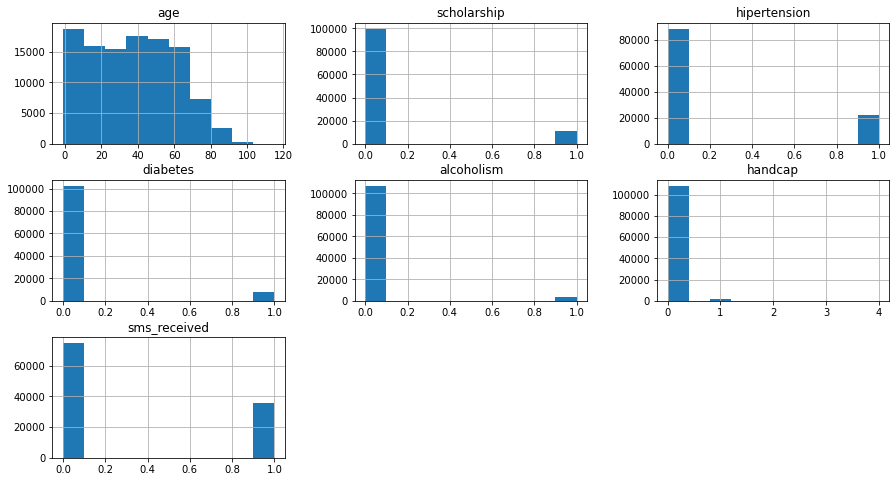

In [15]:
#plotting histograms of all features
df.hist(figsize=(15,8));

The charts show the continuous and discrete data of the features in the dataset. It can be seen that age conists of continuous values and the remaining features contain discrete values of 0 and 1

Plotting the 'no-show' feature to understand the dependent variable that
#was not show in the general histogram plot

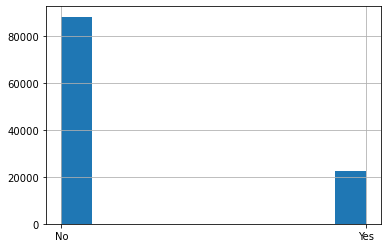

In [16]:
df['no-show'].hist();

The histogram of the 'no-show' column shows the depiction of two dicrete values 'No' and 'Yes' whcich was not earlier depcited. 

#### Changing the datatype of the dependent 'no-show' to plot against other features containing numerical values and atttibuting number to its values 

Attributing the strings 'No' and 'Yes' to '1' and '0' respectively

In [17]:
df['no-show'] = df['no-show'].replace(['No', 'Yes'], ['1', '0'])

Converting the string values to integers

In [18]:
df['no-show'] = df['no-show'].astype(int)

Confirming the changes made from convering the strings to integers

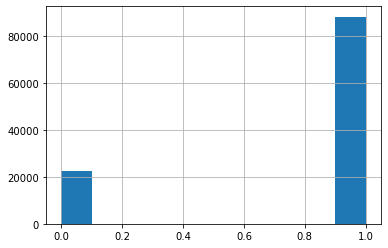

In [19]:
#plotting the histogram for 'no-show'
df['no-show'].hist();

The above chart shows the values 0 and 1 contained in the column 'no-show' which was changed from 'No' and 'Yes' for easier visualisation of numeriacal data

Confirming the datatype of the column in having a general overview

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   gender          110527 non-null  object
 1   scheduledday    110527 non-null  object
 2   appointmentday  110527 non-null  object
 3   age             110527 non-null  int64 
 4   neighbourhood   110527 non-null  object
 5   scholarship     110527 non-null  int64 
 6   hipertension    110527 non-null  int64 
 7   diabetes        110527 non-null  int64 
 8   alcoholism      110527 non-null  int64 
 9   handcap         110527 non-null  int64 
 10  sms_received    110527 non-null  int64 
 11  no-show         110527 non-null  int32 
dtypes: int32(1), int64(7), object(4)
memory usage: 9.7+ MB


In [21]:
def groupbyno_show(a):
    return df.groupby(a)['no-show']

<a id='eda'></a>
## Exploratory Data Analysis

> This section computes statistics of the variable required in the investigation, their relationship and also provides visualisations.
### Do the age of patients affect the chance of a no show at an appointment?

This question explores the age of the patient which might have an effect on their no-show. The age of the pateints if divided into group of 20 to understand the specific age range of the patient and the rate of their no shows. It was calculated by using its mean in conjunction with gender and used in analysis and visualisations. 

Assigning the rows containing 0 in 'no-show' to the varible show anf 1 to the no_show variable

Creating the show and no_show varibles to the rows containing 0 and 1

In [22]:
show = df['no-show'] == 0
no_show = df['no-show'] == 1

In [23]:
#calculating the mean age of no_show and show appointments
print(df.age[no_show].mean())
df.age[show].mean()

37.790064393252315


34.31766656212196

In [24]:
df['age_range'] = pd.cut(x=df['age'], bins=[0, 20, 40, 60, 80, 100])

Grouping by age and gender for the no-show column

no-show
age_range gender no-show         
(0, 20]   F      1          11887
                 0           3533
          M      1           9965
                 0           2924
(20, 40]  F      1          15960
                 0           4796
          M      1           6249
                 0           1830
(40, 60]  F      1          16798
                 0           3870
          M      1           7692
                 0           1721
(60, 80]  F      1           9585
                 0           1760
          M      1           4788
                 0            777
(80, 100] F      1           1609
                 0            313
          M      1            770
                 0            153

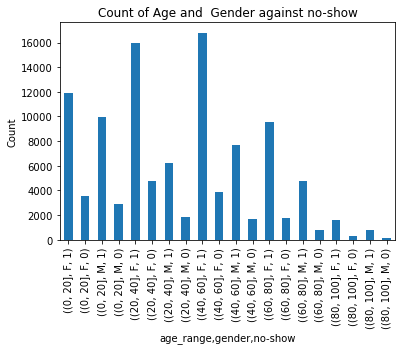

In [25]:
df.groupby(['age_range', 'gender'])['no-show'].value_counts().plot(kind='bar').set_ylabel('Count')
plt.title('Count of Age and  Gender against no-show')
pd.DataFrame(df.groupby(['age_range', 'gender'])['no-show'].value_counts())

From the chart above, the highest count of no-shows are under the 40-60 age range for the 'F' gender

Creating visualisations such as histogram, and boxplots to visualise age againt no show and show varibles in a legend.

Plotting a histogram to view the age against the rate of no-shows holding bins of 20 (intervals)

,count
age,
-1,1.0
0,3539.0
1,2273.0
2,1618.0
3,1513.0
...,...
98,6.0
99,1.0
100,4.0


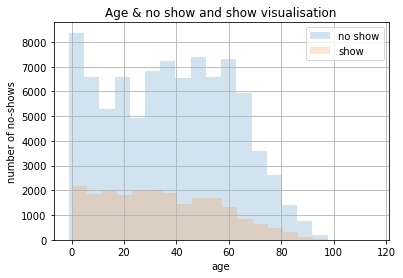

In [26]:
df.age[no_show].hist(alpha=0.2, bins=20, label='no show')
df.age[show].hist(alpha=0.2, bins=20, label='show')
plt.xlabel('age')
plt.ylabel('number of no-shows')
plt.title('Age & no show and show visualisation')
plt.legend()

pd.DataFrame(groupbyno_show('age').describe().loc[:, 'count'])

The rate of no shows are greater than the 'show' of pateints. It is apparent in the rage of 0-60 and gradually declines

Boxplot visualisation of age by no-show

,count,mean,std
age,,,
-1,1.0,1.000000,NaN
0,3539.0,0.819441,0.384707
1,2273.0,0.817422,0.386405
2,1618.0,0.844252,0.362728
3,1513.0,0.816920,0.386860
...,...,...,...
98,6.0,0.833333,0.408248
99,1.0,1.000000,NaN
100,4.0,1.000000,0.000000


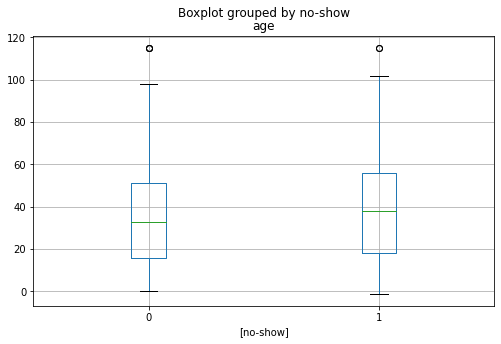

In [27]:
df.boxplot(column=['age'], by= ['no-show'], grid=bool, figsize= (8,5))
pd.DataFrame(groupbyno_show('age').describe().loc[:, ['count','mean','std']])

The middle of the '1' box lies outside the '0' box. The data for '1' is more dispersed than that of '0' and shows the symmetricity of both boxes. 

##### From the analysis of this question, it can be seen that the age of a patient has a substancial effect on the no-show of appointments. The histogram used in this section provided a more visual aid with the age range of 0-16 being the highest range of no-shows

### Which gender shows the most rate of no shows of appointments?

This question explores the gender feature as a whole and its two unique values 'F' and 'M'. Each individual unique value is explored and used in combination with hipertension in extimating the no show of patients. The number of 'F' and 'M' in the dataset to estimate the individual rate of shows and no-shows of the patient with the use of bar charts.

#### Understanding the relationship between gender and other features in the dataset

Getting the examples of values contained in the column

In [28]:
df['gender'].value_counts

<bound method IndexOpsMixin.value_counts of 0         F
1         M
2         F
3         F
4         F
         ..
110522    F
110523    F
110524    F
110525    F
110526    F
Name: gender, Length: 110527, dtype: object>

Group by gender and then no-show to get the number of male and females who showed or did not show for the appointment

In [29]:
#checks the values of the grouping by gender and no-show
groupbyno_show('gender').value_counts()

gender  no-show
F       1          57246
        0          14594
M       1          30962
        0           7725
Name: no-show, dtype: int64

#### Visualisations of gender against no-show and other features

Visualisation of gender with no-show and show of patients

no-show
gender no-show         
F      1          57246
       0          14594
M      1          30962
       0           7725

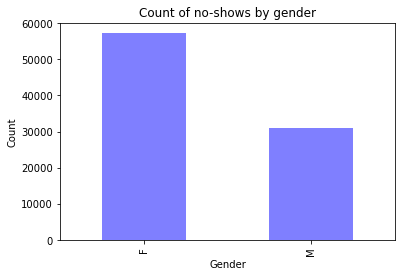

In [30]:
#count of gender with no_show
df.gender[no_show].value_counts().plot(kind='bar',alpha=0.5, color= 'blue')
plt.title('Count of no-shows by gender')
plt.xlabel('Gender')
plt.ylabel('Count')

pd.DataFrame(groupbyno_show('gender').value_counts())

The 'F' gender is seen to be higher than the 'M' gender in the count of no-shows. This is shown in the comparison that the 'F' gender is greater by at least 20k

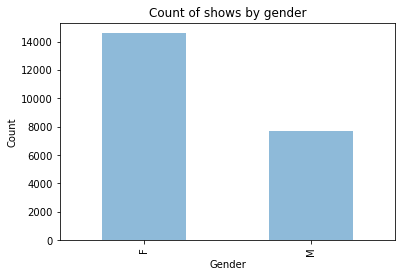

In [31]:
#count of gender with the show of patients
df.gender[show].value_counts().plot(kind='bar',alpha=0.5);
plt.title('Count of shows by gender')
plt.xlabel('Gender')
plt.ylabel('Count');

The 'F' gender is seen to be higher than the 'M' gender in the count of show of the patient. This is shown in the comparison that the 'F' gender is greater by at least 5k

Querying the dataset to obtain the indicidual genders with hipertension and their relationship with the no-show of patients

In [32]:
#assigning the query results to variables
f_hip= df.query('gender == "F"')['hipertension']
m_hip= df.query('gender == "M"')['hipertension']
print(f_hip)
m_hip

0         1
2         0
3         0
4         1
5         1
         ..
110522    0
110523    0
110524    0
110525    0
110526    0
Name: hipertension, Length: 71840, dtype: int64


1         0
11        0
13        0
16        0
22        0
         ..
110501    0
110506    0
110509    0
110513    0
110515    1
Name: hipertension, Length: 38687, dtype: int64

,hipertension
0,44564
1,12682


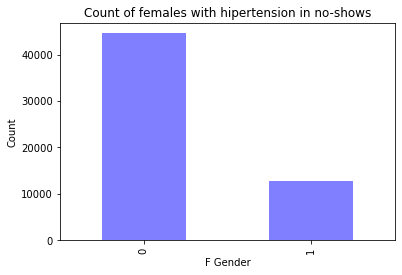

In [33]:
#plotting the results of the values of fmed (female) and no-show
f_hip[no_show].value_counts().plot(kind='bar',alpha=0.5, color= 'blue')
plt.title('Count of females with hipertension in no-shows')
plt.xlabel('F Gender')
plt.ylabel('Count');

pd.DataFrame(f_hip[no_show].value_counts())

It can be seen that the rate of shows in F with hipertension is higher than the no-show

,hipertension
0,11937
1,2657


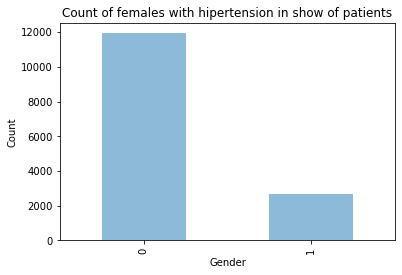

In [34]:
#plotting the results of the values of fmed and show
f_hip[show].value_counts().plot(kind='bar',alpha=0.5)
plt.title('Count of females with hipertension in show of patients')
plt.xlabel('Gender')
plt.ylabel('Count');

pd.DataFrame(f_hip[show].value_counts())

It can be seen that the rate of shows in F with hipertension is higher

,hipertension
0,25615
1,5347


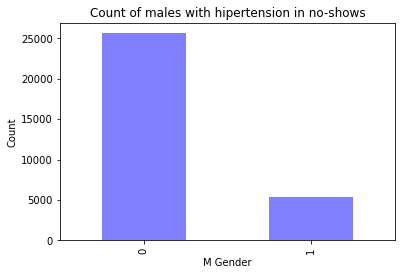

In [35]:
#plotting the results of the values of mmed (male) and no-show
m_hip[no_show].value_counts().plot(kind='bar',alpha=0.5, color= 'blue')
plt.title('Count of males with hipertension in no-shows')
plt.xlabel('M Gender')
plt.ylabel('Count');

pd.DataFrame(m_hip[no_show].value_counts())

It can be seen that the rate of shows in M with hipertension is higher than the no-show

,hipertension
0,6610
1,1115


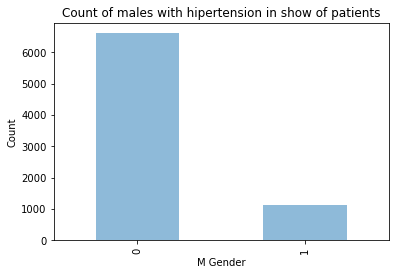

In [36]:
#plotting the results of the values of mmed and show
m_hip[show].value_counts().plot(kind='bar',alpha=0.5)
plt.title('Count of males with hipertension in show of patients')
plt.xlabel('M Gender')
plt.ylabel('Count');

pd.DataFrame(m_hip[show].value_counts())

It can be seen that the rate of shows in M with hipertension is higher

From the above analysis it an be seen that from all counts the 'F' gender is higher in both the rates of no-shows and shows of patients even in combination with hipertenstion from the plotted bar charts and as such as an effect on the no-show of the patient.

### Does the neigbourhood of the patient affect the rate of no show?

The neighbourhood of the patient might move on their no-show as the location of the patient might have a longer time estimate to get there which might in a no-shows. A sample of the neighbourhoods listed is used to derive an estimate on the rate of no-shows from the point of each individual neighbourhood. 

Counting the various neighbourhoods in the neighbourhood column

In [37]:
df['neighbourhood'].value_counts()

JARDIM CAMBURI                 7717
MARIA ORTIZ                    5805
RESISTÊNCIA                    4431
JARDIM DA PENHA                3877
ITARARÉ                        3514
                               ... 
ILHA DO BOI                      35
ILHA DO FRADE                    10
AEROPORTO                         8
ILHAS OCEÂNICAS DE TRINDADE       2
PARQUE INDUSTRIAL                 1
Name: neighbourhood, Length: 81, dtype: int64

Visualising a sample of neigbourhood to no show and show of patients

                     neighbourhood
MARIA ORTIZ                     13
ILHA DO PRÍNCIPE                 8
JARDIM DA PENHA                  8
ITARARÉ                          7
FORTE SÃO JOÃO                   7
SÃO CRISTÓVÃO                    7
SANTA MARTHA                     7
ANDORINHAS                       7
SÃO PEDRO                        6
CRUZAMENTO                       6
JARDIM CAMBURI                   6
RESISTÊNCIA                      6
SANTO ANDRÉ                      6
MARUÍPE                          5
NOVA PALESTINA                   5
SÃO JOSÉ                         5
ILHA DE SANTA MARIA              5
CONSOLAÇÃO                       4
JABOUR                           4
BONFIM                           4
TABUAZEIRO                       4
JESUS DE NAZARETH                4
DA PENHA                         4
PRAIA DO CANTO                   4
GRANDE VITÓRIA                   3
BELA VISTA                       3
CENTRO                           3
GURIGICA            

,neighbourhood
TABUAZEIRO,4
ITARARÉ,4
RESISTÊNCIA,3
DA PENHA,3
MARUÍPE,3
MARIA ORTIZ,3
JARDIM CAMBURI,3
SÃO JOSÉ,3
JESUS DE NAZARETH,3
PRAIA DO SUÁ,2


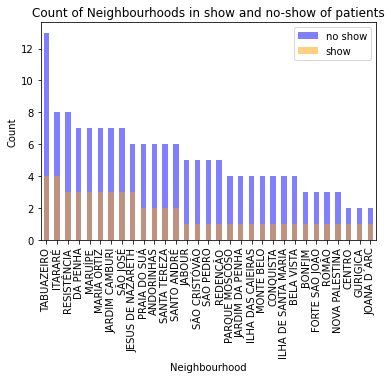

In [38]:
neighbourhood_sample= df['neighbourhood'].sample(n= 250)
neighbourhood_sample[no_show].value_counts().plot(kind='bar',alpha=0.5, color= 'blue', label='no show')
neighbourhood_sample[show].value_counts().plot(kind='bar',alpha=0.5, color= 'orange', label='show')
plt.xlabel('Neighbourhood')
plt.ylabel('Count')
plt.title('Count of Neighbourhoods in show and no-show of patients')
plt.legend();

print(pd.DataFrame(neighbourhood_sample[no_show].value_counts()))
pd.DataFrame(neighbourhood_sample[show].value_counts())

This shows that the highest rate of no shows and shows are from the TABUAZEIRO neighbourhood form a sample of 250. 

From the above analysis, it can be seen that the highest rate of no-shows obtained from the sample of 250 is Tabuazeiro TABUAZEIRO and its places an equal rate of shows with ITARARE. This shows the location of the neighbourhood affects the rate of no-shows

### How does the sholarship affect the rate of no show?

The schlarship of the depicts whether the patients is enrolled in the Brasilian welfare program Bolsa Família. This feature was analysed using its mean in combination with the no-show feature and also sms_received. It implored the use of bar charts to provide visualisations. 

In [39]:
#mean of scholarship column
smean= df['scholarship'].mean()
smean

0.09826558216544373

Visualisation of scholarship and no-show

In [40]:
groupbyno_show('scholarship').mean().value_counts()

0.801928    1
0.762637    1
Name: no-show, dtype: int64

,no-show
scholarship,
0,99666
1,10861


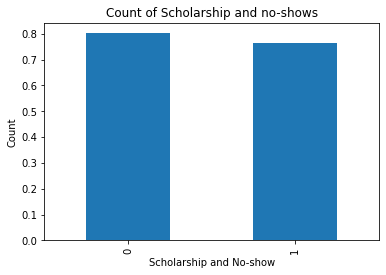

In [41]:
groupbyno_show('scholarship').mean().plot(kind='bar')
plt.xlabel('Scholarship and No-show')
plt.ylabel('Count')
plt.title('Count of Scholarship and no-shows')

pd.DataFrame(groupbyno_show('scholarship').count())

The highest count of patients with sholariships and no-shows is ove 90k and the count of patients of no scholarship and no-show is over 10k 

Visualisation of scholarship ans sms_received against no-show to view the rate at which patients with a scholarship did not show up for an appointment

In [42]:
#value count of scholarship, sms-received and no-show
df.groupby(['scholarship', 'sms_received'])['no-show'].value_counts()

scholarship  sms_received  no-show
0            0             1          56548
                           0          11141
             1             1          23377
                           0           8600
1            0             1           5962
                           0           1394
             1             1           2321
                           0           1184
Name: no-show, dtype: int64

no-show
scholarship sms_received         
0           0               67689
            1               31977
1           0                7356
            1                3505

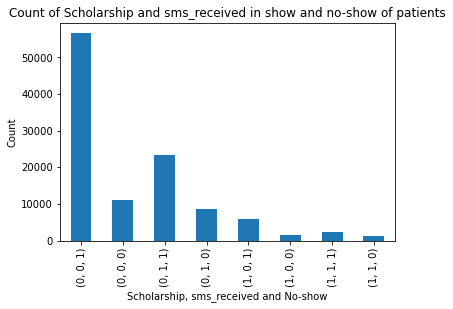

In [43]:
df.groupby(['scholarship', 'sms_received'])['no-show'].value_counts().plot(kind='bar')
plt.xlabel('Scholarship, sms_received and No-show')
plt.ylabel('Count')
plt.title('Count of Scholarship and sms_received in show and no-show of patients');

pd.DataFrame(df.groupby(['scholarship', 'sms_received'])['no-show'].count())


The above chart shows the highest count of shcolarship, sms_recived and no-show is seen in a patient having no schlarship, no sms_recieved and therefore a no-show at the appointment

The above analysis of this secton showed that the scholarship does affect the no-show of the patient. From the last bar chart plotted it was seen that the scholarship of a patient with no sms_recieved produced the highest rate of no shows rather than one wth scholarship or one with sms_received.

<a id='conclusions'></a>
## Conclusions

The dataset included 110527 rows an 14 columns of features. This dataset does not provide a good sample of the population of Brazil which at 2020 was approxiately 212 million. The dataset did not include any missing or duplicated values and as such had no influence on the level of invesigatio done on it. The data was analysed from the point of one dependent variable and multiple independent variables. In the comparison of gender and no-show it wa seen that the 'F' gender was the highest in the rate of no-shows of patients during appointments and when used in combination with age it still was the highest in the range of 40-60 after separating the age in ranges of 20. JARDIM CAMBURI also showed an apparent high in the rate of no-shows of the patient. This report includes single and multiple variable exploratons of the dependent and independent variable as seen in scholarship and sms_received. The mean of certain columns were used in the analysis of it with the no-show feature where other statistical tests such as regression smay have been explored in to provide a more accurate analysis. The use of independent variables were limited to certain number and the questions as well. The question implored a small section of the chosen independent variables and maybe further explored. An analysis done on the neighbourhood of the patients used a sample of the data instead of the entire data of the feature, whch maybe investigated further to include a wider range of samples. The datatype of the 'no-show' column was changed along with its values to plot charts for numerical analysis in conjunction with other features of the dataset ot answer its questions. This coul dbe left as it is and used with other statistical tests to arrive at another conclusion. 